In [1]:
import numpy as np

In [2]:
# Day 1
data = np.loadtxt('day1.txt')
print(np.sum(data[1:] > data[:-1]))
#print(np.sum(np.diff(data) > 0))
#print(np.sum(np.diff(data[0:-2] + data[1:-1] + data[2:]) > 0))
print(np.sum(data[3:] > data[:-3]))

1521
1543


In [3]:
# Day 2
pos = [0,0]
with open('day2.txt', 'r') as f:
    for line in f:
        direction, distance = line.split(' ')
        if direction[0] == 'f':
            pos[0] += int(distance)
        elif direction[0] == 'u':
            pos[1] -= int(distance)
        else:
            pos[1] += int(distance)
print(pos[0]*pos[1])

pos = [0,0]
aim = 0
with open('day2.txt', 'r') as f:
    for line in f:
        direction, distance = line.split(' ')
        d = int(distance)
        if direction[0] == 'f':
            pos[0] += d
            pos[1] += aim*d
        elif direction[0] == 'u':
            aim -= d
        else:
            aim += d
print(pos[0]*pos[1])


2215080
1864715580


In [4]:
# Day 3
#data = np.array(np.loadtxt('day3.txt', converters={0:lambda s: [c for c in s]}, dtype=np.chararray)) - 48
with open('day3.txt') as fid:
    tmp = fid.read().strip().split('\n')
data = np.array([list(map(int, line)) for line in tmp]) 
tmp = data.sum(0)/data.shape[0] + 0.5 + 1e-16
tmp = tmp.astype(int)
gamma = ''.join([str(t) for t in tmp])
epsilon = ''.join([str(int(not t)) for t in tmp])
print(int(gamma, 2)*int(epsilon, 2))

mask1 = np.ones(data.shape[0], dtype=bool)
for j in range(data.shape[1]):
    N_most_common = np.sum(mask1)
    if N_most_common <= 1:
        break
    most_common  = int(np.sum(data[mask1,j])/N_most_common + 0.5 + 1e-16)
    mask1 &= (data[:,j] == most_common)

mask2 = np.ones(data.shape[0], dtype=bool)
for j in range(data.shape[1]):
    N_least_common = np.sum(mask2)
    if N_least_common <= 1:
        break
    least_common = int(np.sum(data[mask2,j])/N_least_common + 0.5 + 1e-16)
    mask2 &= mask2 & (data[:,j] != least_common)
    
oxygen = ''.join([str(t) for t in data[mask1, :][0]])
co2scrubber = ''.join([str(t) for t in data[mask2, :][0]])
print(int(oxygen, 2)*int(co2scrubber, 2))


1307354
482500


In [5]:
# Day 4
class BingoBoard:
    def __init__(self, bingo_array):
        self.bingo_array = bingo_array
        self.marked = np.zeros(bingo_array.shape, dtype=bool)
        self.sum = np.sum(bingo_array)
        self.done = False
    
    def mark_number(self, value):
        col_list, row_list = np.where(self.bingo_array == value)
        if len(col_list > 0):
            col, row = col_list[0], row_list[0]
            self.marked[col, row] = True
            self.sum -= value
            if np.all(self.marked[:,row]) or np.all(self.marked[col, :]):
                self.done = True
                return self.sum*value
        return 0
    
with open('day4.txt', 'r') as f:
    for line in f:
        numbers = [int(s) for s in line.split(',')]
        break

A = np.loadtxt('day4.txt', skiprows=1, dtype=int)
bingo_plates = [BingoBoard(A[5*i:5*(i + 1), :]) for i in range(100)]

winners = []
for num in numbers:
    for index, b in enumerate(bingo_plates):
        if b.done:
            continue
        tmp = b.mark_number(num)
        if tmp > 0:
            winners.append((index, tmp))

            
print(winners[0], winners[-1])


(71, 49860) (22, 24628)


4745
18442


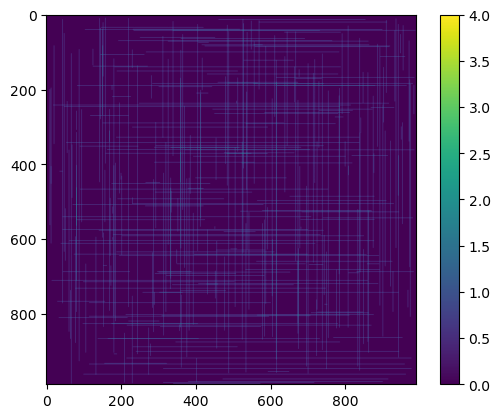

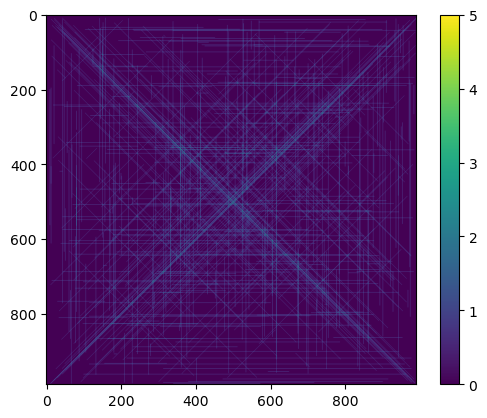

In [6]:
# Day 5
import matplotlib.pyplot as plt
points = []
with open('day5.txt', 'r') as f:
    for line in f:
        points.append([int(u) for u in line.replace('->',',').split(',')])
points_array = np.array(points)
xmax0 = max(np.max(points_array[:,0]), np.max(points_array[:,2]))
ymax0 = max(np.max(points_array[:,1]), np.max(points_array[:,3]))

my_map = np.zeros((xmax0 + 1, ymax0 + 1), dtype=int)
for x1, y1, x2, y2 in points_array:
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    if (xmin != xmax) and (ymin == ymax):
        my_map[xmin:xmax + 1, ymin] += 1
    elif (xmin == xmax) and (ymin != ymax):
        my_map[xmin, ymin:ymax + 1] += 1
print(np.sum([my_map > 1]))
plt.imshow(my_map)
plt.colorbar()

my_map = np.zeros((xmax0 + 1, ymax0 + 1), dtype=int)
for x1, y1, x2, y2 in points_array:
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    xdir = np.sign(x2 - x1) 
    ydir = np.sign(y2 - y1)
    vx = np.arange(xmax - xmin + 1)
    vy = np.arange(ymax - ymin + 1)
    my_map[x1 + xdir*vx, y1 + ydir*vy] += 1
    
plt.figure()
plt.imshow(my_map)
plt.colorbar()

print(np.sum([my_map > 1]))

In [7]:
# Day 6
data = np.loadtxt('day6.txt', delimiter=',', dtype=int)
n = 9
population = np.zeros(n, dtype=int)
for d in data:
    population[d] += 1
#for age, count in zip(*np.unique(data, return_counts=True)):
#    population[age] = count

index_start = 0
for days in range(256):
    population[(index_start + 7) % n] += population[index_start]
    index_start = (index_start + 1) % n
    if days == 79 or days == 255:
        print(np.sum(population))
    #print([population[(index_start + j) % n] for j in range(9)])

380758
1710623015163


In [8]:
# Day 7
data = np.loadtxt('day7.txt', delimiter=',', dtype=int)

pos, count = np.unique(data, return_counts=True)
fuel_cost = [np.sum(np.abs(pos - j)*count) for j in range(pos[0], pos[-1] + 1)]
print(np.min(fuel_cost))

cost = lambda d:d*(d+1)//2
fuel_cost = [np.sum(cost(np.abs(pos - j))*count) for j in range(pos[0], pos[-1] + 1)]
print(np.min(fuel_cost))

329389
86397080


In [9]:
# Day 8
data = np.loadtxt('day8.txt', dtype=np.chararray)

# Part 1:
occurences = 0
length_filters = [2, 3, 4, 7]
for d in data[:,11:]:
    for s in d:
        if len(s) in length_filters:
            occurences += 1
print(occurences)

# Part 2:
inp = [[0,1,2,4,5,6], [2,5], [0,2,3,4,6], [0,2,3,5,6], [1,2,3,5], [0,1,3,5,6], [0,1,3,4,5,6],
       [0,2,5], [0,1,2,3,4,5,6], [0,1,2,3,5,6]]
inp_set = [set(t) for t in inp]
alphabet = {c:i for i, c in enumerate('abcdefg')}

def get_unique_info(list_of_strings, list_of_segment_lists):
    s = ''.join(list_of_strings)
    c, counts_c = np.unique([x for x in s], return_counts=True)
    i, counts_i = np.unique(np.hstack(list_of_segment_lists), return_counts=True)
    
    out = []
    for j in range(min(counts_c), max(counts_c) + 1):
        letters = c[counts_c == j]
        indices = i[counts_i == j]
        if indices.shape[0] == 0:
            continue
        out.append((''.join(letters), indices))
    return out

def use_information(info, corr):
    indices = [alphabet[c] for c in info[0]]
    n = corr.shape[0]
    
    mask_col = np.ones(n, dtype=bool)
    mask_col[info[1]] = False
    mask_row = np.ones(n, dtype=bool)
    mask_row[indices] = False
    
    for i in indices:
        corr[mask_col, i] = False
    for j in info[1]:
        corr[j, mask_row] = False

def get_translation(list_of_strings):
    correlation = np.ones((7,7), dtype=bool)
    info_tot = get_unique_info(list_of_strings, inp)
    # 1 and 7 turns out to be redundant:
    #info_tot.append(([s for s in list_of_strings if len(s) == 2][0], inp[1])) #1
    #info_tot.append(([s for s in list_of_strings if len(s) == 3][0], inp[7])) #7
    info_tot.append(([s for s in list_of_strings if len(s) == 4][0], inp[4])) #4
    for info in info_tot:
        use_information(info, correlation)
    ix, iy = np.where(correlation.T)
    return iy

def get_number_from_string(input_string, iy):
    segment_list = set([iy[alphabet[c]] for c in input_string])
    return inp_set.index(segment_list)

def get_number_from_list_of_strings(list_of_strings, iy):
    return int(''.join([str(get_number_from_string(s, iy)) for s in list_of_strings]))

out = 0
for row in data:
    iy = get_translation(row[:10])
    out += get_number_from_list_of_strings(row[11:], iy)
    
print(out)


476
1011823


514
1103130


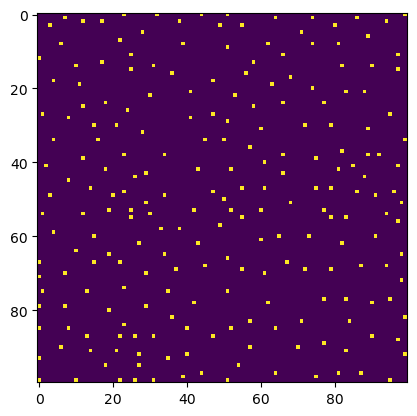

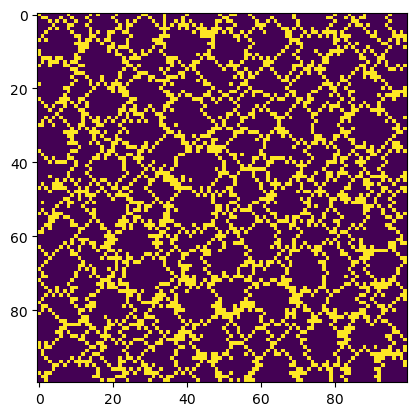

In [10]:
# Day 9
#data = np.loadtxt('day9.txt', converters={0:lambda s:[int(c) - 48 for c in s]}, dtype=int)
with open('day9.txt') as fid:
    tmp = fid.read().strip().split('\n')
data = np.array([list(map(int, line)) for line in tmp]) 
is_low = np.empty(data.shape, dtype=bool)

is_low[1:-1,1:-1] = ((data[1:-1,1:-1] < data[0:-2,1:-1]) & (data[1:-1,1:-1] < data[2:,1:-1]) & 
 (data[1:-1,1:-1] < data[1:-1,0:-2]) & (data[1:-1,1:-1] < data[1:-1,2:]))

is_low[1:-1,0] = (data[1:-1,0] < data[1:-1,1]) & (data[1:-1,0] < data[0:-2,0]) & (data[1:-1,0] < data[2:,0])
is_low[1:-1,-1] = (data[1:-1,-1] < data[1:-1,-2]) & (data[1:-1,-1] < data[0:-2,-1]) & (data[1:-1,-1] < data[2:,-1])
is_low[0,1:-1] = (data[0,1:-1] < data[1,1:-1]) & (data[0,1:-1] < data[0,0:-2]) & (data[0,1:-1] < data[0,2:])
is_low[-1,1:-1] = (data[-1,1:-1] < data[-2,1:-1]) & (data[-1,1:-1] < data[-1,0:-2]) & (data[-1,1:-1] < data[-1,2:])
is_low[0,0] = (data[0,0] < data[0,1]) & (data[0,0] < data[1,0])
is_low[0,-1] = (data[0,-1] < data[0,-2]) & (data[0,-1] < data[1,-1])
is_low[-1,0] = (data[-1,0] < data[-1,1]) & (data[-1,0] < data[-2,0])
is_low[-1,-1] = (data[-1,-1] < data[-1,-2]) & (data[-1,-1] < data[-2,-1])

print(np.sum(data[is_low] + 1))

barriers = data == 9
direction_vectors = {'N':[-1, 0], 'S':[1, 0], 'E':[0, 1], 'W':[0, -1]}
def walk_the_walk(point, direction, all_points):
    for new_direction in ['N', 'S', 'E', 'W']:
        vector = direction_vectors[new_direction]
        new_point = [point[0] + vector[0], point[1] + vector[1]]
        if -1 < new_point[0] < data.shape[0] and -1 < new_point[1] < data.shape[1] and not barriers[new_point[0], new_point[1]]:
            flat_index = new_point[0]*data.shape[1] + new_point[1]
            if flat_index not in all_points:
                all_points.add(flat_index)
                walk_the_walk(new_point, new_direction, all_points)

indices_x, indices_y = np.where(is_low)

plt.figure()
plt.imshow(is_low)
plt.figure()
plt.imshow(barriers)
size_holes = []
for ix, iy in zip(indices_x, indices_y):
    all_points = set()
    walk_the_walk([ix, iy], 'N', all_points)
    size_holes.append(len(all_points))
    #plt.figure()
    #data2 = data.copy()
    #for p in all_points:
    #    ix = p // data.shape[1]
    #    iy = p % data.shape[1]
    #    data2[ix, iy] = -10
    #plt.imshow(data2)
    #plt.colorbar()

size_holes_sorted = np.sort(size_holes)
print(size_holes_sorted[-3]*size_holes_sorted[-2]*size_holes_sorted[-1])



In [11]:
# Day 10
openings = ['(', '[','{','<']
closings = [')', ']','}','>']

matched_closing = {openings[j]:closings[j] for j in range(len(openings))}
points_dict = {')':3, ']':57, '}':1197, '>':25137}

def get_auto_complete_points(s):
    points = 0
    add_points_dict = {')':1, ']':2, '}':3, '>':4}
    for c in s:
        points *= 5
        points += add_points_dict[c]
    return points

syntax_points = 0
auto_complete_points = []
with open('day10.txt', 'r') as f:
    for line in f:
        state = []
        syntax_error = False
        for c in line:
            if c in openings:
                state.append(c)
            elif c in closings:
                if len(state) == 0:
                    #print('Mismatched parantheses!')
                    syntax_error = True
                    break
                else:
                    last_open = state.pop()
                    expected_ending = matched_closing[last_open]
                    if expected_ending != c:
                        #print(f'Syntax error: got {c}, expected {expected_ending}!')
                        syntax_points += points_dict[c]
                        syntax_error = True
                        break
        if len(state) != 0 and not syntax_error:
            #print('Unexpected line end!')
            auto_complete_list = [matched_closing[c] for c in state[::-1]]
            auto_complete_points.append(get_auto_complete_points(''.join(auto_complete_list)))
            
print(syntax_points)
auto_complete_points_sorted = np.sort(auto_complete_points)
print(auto_complete_points_sorted[auto_complete_points_sorted.shape[0]//2])


268845
4038824534


In [12]:
# Day 11
#data = np.loadtxt('day11.txt', converters={0:lambda s:[int(c) - 48 for c in s]}, dtype=int)
with open('day11.txt') as fid:
    tmp = fid.read().strip().split('\n')
data = np.array([list(map(int, line)) for line in tmp]) 

def flash_point(point, data, is_exploding):
    j, i = point
    for vx in [-1, 0, 1]:
        for vy in [-1, 0, 1]:
            if vx == 0 and vy == 0:
                continue
            jj = j + vx
            ii = i + vy
            if jj < 0 or jj >= data.shape[0] or ii < 0 or ii >= data.shape[1]:
                continue
            data[jj, ii] += 1
            if data[jj, ii] > 9 and not is_exploding[jj, ii]:
                is_exploding[jj, ii] = True
                flash_point([jj, ii], data, is_exploding)

N_flashes = 0
step = 0
sync_step = -1
N_flashes_after_100_steps = -1
while step < 100 or sync_step < 0:
    data += 1
    is_exploding = data > 9
    ix, iy = np.where(is_exploding)
    for ix, iy in zip(ix,iy):
        flash_point([ix, iy], data, is_exploding)
    N_flashes_step = np.sum(is_exploding)
    N_flashes += N_flashes_step
    if N_flashes_step == data.shape[0]*data.shape[1] and sync_step < 0:
        sync_step = step + 1
    if step == 99:
        N_flashes_after_100_steps = N_flashes
    
    data[is_exploding] = 0
    step += 1
    
print(N_flashes_after_100_steps)
print(sync_step)


1686
360


In [13]:
# Day 12
connections = {}
with open('day12.txt', 'r') as f:
    for line in f:
        vert1, vert2 = line.strip('\n').split('-')
        if vert1 in connections:
            connections[vert1].append(vert2)
        else:
            connections[vert1] = [vert2]
        if vert2 in connections:
            connections[vert2].append(vert1)
        else:
            connections[vert2] = [vert1]

def explore(cave, path, exclusions):
    global N_paths
    for neighbour in connections[cave]:
        if neighbour == 'start' or (neighbour in exclusions and super_nice_cave in exclusions):
            continue
        elif neighbour == 'end':
            #all_paths.append(','.join(path + ['end']))
            N_paths += 1
        else:
            if neighbour.islower():
                new_exclusions = exclusions.copy()
                if neighbour in new_exclusions:
                    new_exclusions.add(super_nice_cave)
                else:
                    new_exclusions.add(neighbour)
            else:
                new_exclusions = exclusions
            explore(neighbour, path + [neighbour], new_exclusions)

N_paths = 0
super_nice_cave = 'super_nice_cave'
explore('start', ['start'], {super_nice_cave})    
print(N_paths)

N_paths = 0
explore('start', ['start'], set())
print(N_paths)

3779
96988


807


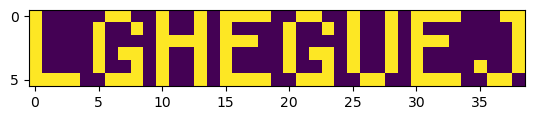

In [14]:
# Day 13
folds = []
XY = []
with open('day13.txt', 'r') as f:
    for line in f:
        if not line.strip():
            continue
        elif line[0] == 'f':
            s1, s2 = line.split('=')
            col = 0 if s1[-1] == 'x' else 1 
            folds.append((col, int(s2)))
        else:
            x, y = line.split(',')
            XY.append([int(x) ,int(y)])

XY = np.array(XY, dtype=int)
def apply_fold(A, position):
    A[A > position] = 2*position - A[A > position]

def count_unique(XY):
    return len({z for z in (XY[:,0]*2147483648 + XY[:,1])})

apply_fold(XY[:,folds[0][0]], folds[0][1])
print(count_unique(XY))

for fold_column, position in folds[1:]:
    apply_fold(XY[:,fold_column], position)
xmax, ymax = XY.max(axis=0)
Z = np.zeros((ymax + 1, xmax + 1), dtype=bool)
Z[XY[:,1], XY[:,0]] = True
plt.imshow(Z)

In [15]:
# Day 14
rules = []
exclude_chars = {' ', '\n', '-', '>'}
with open('day14.txt', 'r') as f:
    starting_polymer = f.readline().strip()
    for line in f:
        if not line.strip():
            continue
        rules.append([c for c in line if c not in exclude_chars])

s = set([c for rule in rules for c in rule])
s.update({c for c in starting_polymer})
letters = {letter:index for index, letter in enumerate(s)}
n = len(letters)

rules_numbers = np.array([[letters[c] for c in tmp] for tmp in rules])

density_matrix = np.zeros((n, n), dtype=int)
for j in range(len(starting_polymer) - 1):
    l1, l2 = starting_polymer[j], starting_polymer[j + 1]
    density_matrix[letters[l1], letters[l2]] += 1

def apply_rules(R, M):
    change = np.zeros(M.shape, dtype=int)
    for x, y, z in R:
        s = M[x, y]
        change[x, z] += s
        change[z, y] += s
        change[x, y] -= s
    M += change

def apply_rules_numpy(R, M):
    # x y z: M[x, z] += M[x, y], M[z, y] += M[x, y], M[x, y] -= M[x, y]
    source = M[R[:,0], R[:,1]]
    flat_index1 = R[:,0]*M.shape[1] + R[:,2]
    flat_index2 = R[:,2]*M.shape[1] + R[:,1]
    
    result = np.bincount(flat_index1, source, n*n)
    result += np.bincount(flat_index2, source, n*n)
    
    M[R[:,0], R[:,1]] = 0
    M += result.astype(int).reshape((n,n))
        
def max_min_diff(A):
    s = A.sum(axis=0)
    # s counts the times a letter is *last* in a pair, so we need to add the first letter of the starting polymer!
    s[letters[starting_polymer[0]]] += 1
    return np.max(s) - np.min(s)

for j in range(40):
    apply_rules_numpy(rules_numbers, density_matrix)
    if j == 9 or j == 39:
        print(max_min_diff(density_matrix))


2947
3232426226464


In [16]:
# Day 15
import heapq
#data = np.loadtxt('day15.txt', converters={0:lambda s:[int(c) - 48 for c in s]}, dtype=int)
with open('day15.txt') as fid:
    tmp = fid.read().strip().split('\n')
data = np.array([list(map(int, line)) for line in tmp]) 

def dive_bfs(point_with_accumulated_risk, data, lowest_risk_to_points, Q):
    accumulated_risk, col, row = point_with_accumulated_risk
    # Return if point has improved in the meantime:
    if accumulated_risk > lowest_risk_to_points[col, row]:
        return
    n = data.shape[0]
    for v in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
        col_new = col + v[0]
        row_new = row + v[1]
        if (0 <= col_new < n) and (0 <= row_new < n):
            accumulated_risk_new = accumulated_risk + data[col_new, row_new]
            if accumulated_risk_new < lowest_risk_to_points[col_new, row_new]:
                # Update lowest_cost_to_point and push point to queue
                lowest_risk_to_points[col_new, row_new] = accumulated_risk_new
                heapq.heappush(Q, (accumulated_risk_new, col_new, row_new))

def do_search(data):
    lowest_risk_to_points = 2**31*np.ones(data.shape, dtype=int)
    Q = []
    heapq.heappush(Q, (0, 0, 0))
    while len(Q) > 0:
        q = heapq.heappop(Q)
        dive_bfs(q, data, lowest_risk_to_points, Q)
    return lowest_risk_to_points[-1,-1]

lowest_risk = do_search(data)
print(lowest_risk)

n = data.shape[0]
data2 = np.empty((5*n,5*n), dtype=int)
for d in range(5):
    for r in range(5):
        data2[(d*n):((d + 1)*n), (r*n):((r + 1)*n)] = data + d + r
data2[data2 >  9] -=  9

lowest_risk = do_search(data2)
print(lowest_risk)


698
3022


In [17]:
# Day 16
with open('day16.txt', 'r') as f:
    data = f.read().strip()
bit_string = bin(int(data, base=16))[2:]
bit_string = '0'*(4*len(data) - len(bit_string)) + bit_string

operators = [np.sum, np.prod, np.min, np.max, 0, lambda a: a[0] > a[1], lambda a: a[0] < a[1], lambda a: a[0] == a[1]]

def read_package_from_index(bit_string, index, payload):
    global sum_of_version_numbers
    packet_version = int(bit_string[(index + 0):(index + 3)], 2)
    packet_type_id = int(bit_string[(index + 3):(index + 6)], 2)
    sum_of_version_numbers += packet_version
    index += 6
    if packet_type_id == 4:
        collect_bits = ''
        while index < len(bit_string):
            continue_bit = bit_string[index]
            index += 1
            collect_bits += bit_string[index:(index + 4)]
            index += 4
            if continue_bit != '1':
                break
        payload.append(int(collect_bits, 2))
    else:
        length_type_id = bit_string[index]
        index += 1
        sub_payload = []
        if length_type_id == '0':
            length_of_sub_packages = int(bit_string[index:(index + 15)], 2)
            index += 15
            index_sub_final = index + length_of_sub_packages
            while index < index_sub_final:
                index = read_package_from_index(bit_string, index, sub_payload)
        else:
            number_of_sub_packages = int(bit_string[index:(index + 11)], 2)
            index += 11
            for j in range(number_of_sub_packages):
                index = read_package_from_index(bit_string, index, sub_payload)
        payload.append(operators[packet_type_id](sub_payload))
    return index
    
payload = []
sum_of_version_numbers = 0
read_package_from_index(bit_string, 0, payload)
print(sum_of_version_numbers)
print(payload[0])

821
2056021084691


In [18]:
# Day 17
with open('day17.txt') as f:
    line = f.read().strip()

target_area = ''.join([(ch if ch in '01234567890-' else ' ') for ch in line]).split()
target_area = [int(t) for t in target_area]

def get_valid_steps_for_vy_numpy(v_y, ymin, ymax):
    add_step = np.zeros(v_y.shape)
    positive_mask = v_y > 0    
    add_step[positive_mask] = 2*v_y[positive_mask] + 1
    v_y[positive_mask] = -v_y[positive_mask] - 1
        
    step_min = np.ceil(v_y + 0.5 + np.sqrt((v_y + 0.5)**2 - 2*ymax))
    step_max = np.floor(v_y + 0.5 + np.sqrt((v_y + 0.5)**2 - 2*ymin))
    
    return step_min + add_step, step_max + add_step
        
def get_valid_steps_for_vx_numpy(v_x, xmin, xmax, maxstep):
    max_reach = v_x*(v_x + 1)/2
    mask_will_reach = max_reach >= xmin
    step_min = np.ones(v_x.shape)
    step_max = np.zeros(v_x.shape)
    
    step_min[mask_will_reach] = np.ceil(v_x[mask_will_reach] + 0.5 - np.sqrt((v_x[mask_will_reach] + 0.5)**2 - 2*xmin))
    mask_will_pass = max_reach > xmax
    mask_will_reach_but_not_pass = (mask_will_reach) & (~mask_will_pass)
    step_max[mask_will_pass] = np.floor(v_x[mask_will_pass] + 0.5 - np.sqrt((v_x[mask_will_pass] + 0.5)**2 - 2*xmax))
    step_max[mask_will_reach_but_not_pass] = maxstep
    return step_min, step_max
   
def get_vx_min_max(xmin, xmax):
    vxmin = int(np.ceil(-0.5 + 0.5*np.sqrt(1 + 8*xmin)))
    return vxmin, xmax

def get_vy_min_max(ymin, ymax):
    return ymin, -ymin - 1

#target_area = [20, 30 , -10, -5]
xmin, xmax, ymin, ymax = target_area

vx_min, vx_max = get_vx_min_max(xmin, xmax)
vy_min, vy_max = get_vy_min_max(ymin, ymax)

print(vy_max*(vy_max + 1)//2)

vy_vec = np.arange(vy_min, vy_max + 1)
step_min_y_vec, step_max_y_vec = get_valid_steps_for_vy_numpy(vy_vec, ymin, ymax)
vx_vec = np.arange(vx_min, vx_max + 1)
step_min_x_vec, step_max_x_vec = get_valid_steps_for_vx_numpy(vx_vec, xmin, xmax, step_max_y_vec.max())

N_pairs = 0        
for vy in range(vy_min, vy_max + 1):
    step_min_y = step_min_y_vec[vy - vy_min]
    step_max_y = step_max_y_vec[vy - vy_min]
    for vx in range(vx_min, vx_max + 1):
        step_min_x = step_min_x_vec[vx - vx_min]
        step_max_x = step_max_x_vec[vx - vx_min]
        if step_max_x < step_min_x:
            continue
        if max(step_min_x, step_min_y) <= min(step_max_x, step_max_y):
            N_pairs += 1
            
print(N_pairs)

4560
3344


In [19]:
import copy
from operator import itemgetter

def composite_function(f, g):
    return lambda x : f(g(x))

def dfs(elem, work, state, pos=1):
    if isinstance(elem, int):
        stop_search = work(elem, pos, state)
        if stop_search:
            return True
    else:
        if dfs(elem[0], work, state, (pos << 1) + 0):
            return True
        if dfs(elem[1], work, state, (pos << 1) + 1):
            return True
    return False

def get_snf(snf, pos):
    last = lambda e: e
    while pos != 1:
        last = composite_function(last, itemgetter(pos % 2))
        pos >>= 1
    return last(snf)

def set_snf(snf, pos, value):
    right_bit = pos % 2
    pos >>= 1
    last = lambda e: e
    while pos != 1:
        last = composite_function(last, itemgetter(pos % 2))
        pos >>= 1
    last(snf)[right_bit] = value

def explode(snf):
    state = {'pos_left':-1, 'pos_right':-1, 'pos_explode':-1}
    def work_explode(elem, pos, state):
        if pos >= 0b100000 and state['pos_explode'] < 0:
            state['pos_explode'] = (pos >> 1)
        if state['pos_explode'] < 0:
            state['pos_left'] = pos
        if state['pos_explode'] > 0 and (pos >> 1) != state['pos_explode']:
            state['pos_right'] = pos
            return True
        return False
    dfs(snf, work_explode, state, 1)
    if (pos := state['pos_explode']) > 0:
        # Explode happened
        add_left, add_right = get_snf(snf, pos)
        set_snf(snf, pos, 0)
        if (pos_left := state['pos_left']) > 0:
            val = get_snf(snf, pos_left) + add_left
            set_snf(snf, pos_left, val)
        if (pos_right := state['pos_right']) > 0:
            val = get_snf(snf, pos_right) + add_right
            set_snf(snf, pos_right, val)
        return True
    return False

def split(snf):
    state = {'split_pos':-1, 'split_val':0}
    def work_split(elem, pos, state):
        if elem > 9:
            state['split_pos'] = pos
            state['split_val'] = elem
            return True
        return False
    dfs(snf, work_split, state, 1)
    if (pos := state['split_pos']) > 0:
        val = state['split_val']
        set_snf(snf, pos, [val//2, (val + 1)//2])
        return True
    return False

def reduce(snf):
    not_done = True
    while (not_done):
        if explode(snf):
            continue
        not_done = split(snf)

def add_snf(snf1, snf2):
    snf = [snf1, snf2]
    reduce(snf)
    return snf

def magnitude_snf(elem):
    if isinstance(elem, int):    
        return elem
    else:
        val_left  = magnitude_snf(elem[0])
        val_right = magnitude_snf(elem[1])
        return 3*val_left + 2*val_right

with open('day18.txt', 'r') as f:
    snf_all = [eval(line.strip()) for line in f]

snf_all_copy = copy.deepcopy(snf_all)
snf1 = snf_all_copy[0]
for snf2 in snf_all_copy[1:]:
    snf1 = add_snf(snf1, snf2)
print(magnitude_snf(snf1))

max_mag = 0
for snf_left_ini in snf_all:
    for snf_right_ini in snf_all:
        snf_left = copy.deepcopy(snf_left_ini)
        snf_right = copy.deepcopy(snf_right_ini)
        snf = add_snf(snf_left, snf_right)
        max_mag = max(max_mag, magnitude_snf(snf))
print(max_mag)


3654
4578


In [20]:
from collections import defaultdict
def get_all_permutations(s0):
    # Get all permutations of [1, 2, 3]
    permutations = [(0, 1, 2), (2, 0, 1), (1, 2, 0), (0, 2, 1), (1, 0, 2), (2, 1, 0)]
    sign_permutation = [-1, -1, -1, 1, 1, 1]
    # [even, even, even, uneven, uneven, uneven]
    spm = []
    for index, perm in enumerate(permutations):
        p1 = s0.copy()*sign_permutation[index]
        p1 = p1[:,perm]
        p2 = p1.copy()
        p3 = p1.copy()
        p4 = p1.copy()
        p1 *= -1
        p2[:,0] *= -1
        p3[:,1] *= -1
        p4[:,2] *= -1
        spm.append(p1)
        spm.append(p2)
        spm.append(p3)
        spm.append(p4)
    return spm

all_sensors = []
current_sensor = []
with open('day19.txt', 'r') as f:
    for line in f:
        if not line.strip():
            continue
        if line[:3] == '---':
            if len(current_sensor) > 0:
                all_sensors.append(np.array(current_sensor, dtype=int))
                current_sensor = []
        else:
            current_sensor.append([int(d) for d in line.split(',')])
all_sensors.append(np.array(current_sensor, dtype=int))

#data = np.loadtxt('day19 copy.txt', delimiter=',', comments='--')

def try_add_sensor(s0, s1):
    
    d = defaultdict(int)
    all_s1 = get_all_permutations(s1)
    for row0 in s0:
        for index, s in enumerate(all_s1):
            for row1 in s:
                d[tuple(row0 - row1) + (index,)] += 1

    vector_works = []
    for key, val in d.items():
        if val >= 12:
            vector_works  = key
            #print(key, val)
    if len(vector_works) > 0:
        tmp = all_s1[vector_works[3]]
        vec = np.array([vector_works[j] for j in range(3)])
        tmp += vec
        s0 = np.vstack([s0, tmp])
        s0 = np.unique(s0, axis=0)
        return s0, vec
    else:
        return s0, []

s0 = all_sensors.pop(0)
all_vectors = [np.array([0,0,0])]
while len(all_sensors) > 0:
    #print(len(all_sensors))
    s = all_sensors.pop(0)
    s0, vector = try_add_sensor(s0, s)
    if len(vector) == 0:
        #print('Add fail')
        all_sensors.append(s)
    else:
        all_vectors.append(vector)
        #print('add succeeded')
        
print(s0.shape[0])

dmax = 0
for v1 in all_vectors:
    for v2 in all_vectors:
        d = abs(v1[0] - v2[0]) + abs(v1[1] - v2[1]) + abs(v1[2] - v2[2])
        dmax = max(dmax, d)
print(dmax)

355
10842


4928
16605


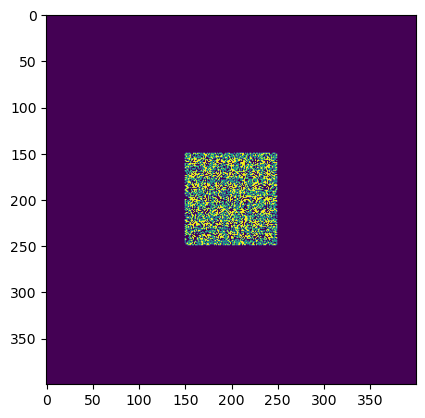

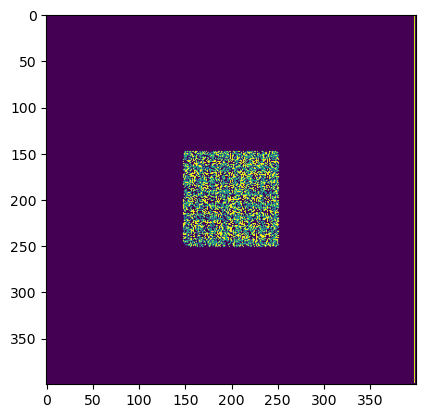

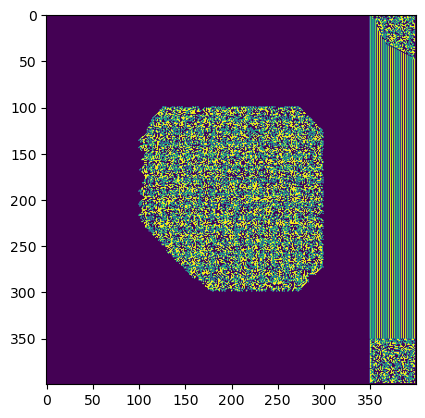

In [21]:
# Day 20
convolution_matrix = np.array([2**n for n in range(8, -1, -1)], dtype=int).reshape((3,3))

with open('day20.txt', 'r') as f:
    img_enhance = f.readline().strip()
    img = []
    for line in f:
        if not line.strip():
            continue
        img.append([0 if c == '.' else 1 for c in line.strip() ])
import matplotlib.pyplot as plt
data = np.array(img, dtype=int)
img_enhancer = np.array([0 if c == '.' else 1 for c in img_enhance.strip() ], dtype=int)
plt.imshow(data)

shape = data.shape
n = 150
data2 = np.zeros((shape[0] + 2*n, shape[1] + 2*n), dtype=int)
data2[n:-n, n:-n] = data
plt.imshow(data2)

def enhancer(data2, j, i):
    index = np.sum(data2[(j - 1):(j + 2), (i - 1):(i + 2)]*convolution_matrix)
    res = img_enhancer[index]
    #if i > 180 and res > 0:
    #    print(j, i, index, res)
    return img_enhancer[index]

data_new = data2
for k in range(50):
    data_old = data_new
    data_new = np.zeros(data_old.shape, dtype=int)
    for j in range(1, data_new.shape[0] - 1):
        for i in range(1, data_new.shape[1] - 1):
            data_new[j, i] = enhancer(data_old, j, i)
    if k == 1 or k == 49:
        plt.figure()
        plt.imshow(data_new)
        print(data_new[60:-60, 60:-60].sum())

In [22]:
# Day 21
with open('day21.txt', 'r') as f:
    p1pos_ini = int(f.readline().strip().split(':')[-1])
    p2pos_ini = int(f.readline().strip().split(':')[-1])

p1score = p2score = 0
p1pos, p2pos = p1pos_ini, p2pos_ini
j = 0
while True:
    dots = (j % 100) + ((j + 1) % 100) + ((j + 2) % 100) + 3 
    p1pos = ((p1pos + dots - 1) % 10) + 1
    j += 3
    p1score += p1pos
    if p1score >= 1000:
        print(j*p2score)
        break
    
    dots = (j % 100) + ((j + 1) % 100) + ((j + 2) % 100) + 3 
    p2pos = ((p2pos + dots - 1) % 10) + 1
    p2score += p2pos
    j += 3
    if p2score >= 1000:
        print(j*p1score)
        break

# Part 2        
outcomes, multiplicities = np.unique(np.add.outer(np.add.outer([1,2,3], [1,2,3]), [1,2,3]), return_counts=True)  
o_and_m = list(zip(outcomes, multiplicities))

cache = -1*np.ones((11, 11, 30, 30, 2, 2), dtype=int)

def find_winner(dots, player, scores, pos):
    pos[player] = ((pos[player] + dots - 1) % 10) + 1
    scores[player] += pos[player]
    if scores[player] >= 21:
        return (0, 1) if player else (1, 0)
    else:
        i1, i2, i3, i4, i5 = pos[0], pos[1], scores[0], scores[1], player
        if cache[i1, i2, i3, i4, player, 0] == -1:
            all_wins_p1, all_wins_p2 = 0,0
            for outcome, multiplicity in o_and_m:
                wins = find_winner(outcome, (player + 1) % 2, scores.copy(), pos.copy())
                all_wins_p1 += wins[0]*multiplicity
                all_wins_p2 += wins[1]*multiplicity
            cache[i1, i2, i3, i4, i5, 0] = all_wins_p1
            cache[i1, i2, i3, i4, i5, 1] = all_wins_p2            
        return cache[i1, i2, i3, i4, i5]

all_wins = [0,0]
for outcome, multiplicity in o_and_m:
    wins = find_winner(outcome, 0, [0,0], [8,6])
    all_wins[0] += wins[0]*multiplicity
    all_wins[1] += wins[1]*multiplicity
    
print(max(all_wins))

503478
716241959649754


In [23]:
# Day 22

ranges = []
with open('day22.txt', 'r') as f:
    for line in f:
        t = ''.join([c if c in '-01234567890' else ' ' for c in line]).split()
        val = np.empty(7, dtype=int)
        val[:-1] = [int(tt) for tt in t]
        val[-1] = 1 if line[1] == 'n' else 0
        ranges.append(val)
ranges = np.array(ranges)

reactor = np.zeros((101, 101, 101), dtype=int)
ranges_moved = ranges.copy()
ranges_moved[:,:-1] += 50

for r in ranges_moved:
    if (0 <= r[0] <= reactor.shape[0] and 0 <= r[1] <= reactor.shape[0] and
        0 <= r[2] <= reactor.shape[1] and 0 <= r[3] <= reactor.shape[1] and
        0 <= r[4] <= reactor.shape[2] and 0 <= r[5] <= reactor.shape[2]):
        reactor[r[0]:(r[1] + 1), r[2]:(r[3] + 1), r[4]:(r[5] + 1)] = r[6]
print(reactor.sum())

#Part 2
def cuboid_overlap(cuboid1, cuboid2):
    xm, xp = max(cuboid1[0], cuboid2[0]), min(cuboid1[1], cuboid2[1])
    ym, yp = max(cuboid1[2], cuboid2[2]), min(cuboid1[3], cuboid2[3])
    zm, zp = max(cuboid1[4], cuboid2[4]), min(cuboid1[5], cuboid2[5])
    if xm > xp or ym > yp or zm > zp:
        return []
    else:
        return [xm, xp, ym, yp, zm, zp]

def compute_Dn_from_An(An):
    Dn = []
    for j, Anj in enumerate(An):
        # Only add Anj itself if +1 and not if 0
        Dnj = [list(Anj) + [1]] if Anj[6] == 1 else []
        for Dni in Dn:
            for Dnii in Dni:
                overlap = cuboid_overlap(Anj, Dnii)
                if len(overlap) > 0:
                    Dnj.append(overlap + [-Dnii[-1]])
        Dn.append(Dnj.copy())
    return Dn

def compute_vertices_from_range(r):
    dx = r[1] - r[0] + 1
    dy = r[3] - r[2] + 1
    dz = r[5] - r[4] + 1
    return dx*dy*dz

def compute_sum_from_ranges(ranges):
    An = ranges
    Dn = compute_Dn_from_An(An)
    s = 0
    signs = [-1, 1]
    for index, Dni in enumerate(Dn):
        for Dnii in Dni:
            s += compute_vertices_from_range(Dnii)*Dnii[-1]
    return s
            
print(compute_sum_from_ranges(ranges))

581108
1325473814582641


In [24]:
# Day 23
# Part one
from collections import defaultdict
from functools import cache
import heapq

def explore(pos, visited, blocking, steps):
    if pos not in blocking and pos not in visited:
        visited[pos] = steps
        for move in [(-1,0), (1,0), (0,-1), (0,1)]:
            explore((pos[0] + move[0], pos[1] + move[1]), visited, blocking, steps + 1)

@cache
def get_acceptable_moves(from_pos, all_pos, boundary_tuple):
    blocking = {pos for pos in all_pos if pos != from_pos} | set(boundary_tuple)
    visited = {}
    explore(from_pos, visited, blocking, 0)
    return visited

@cache
def get_goal_row_from_state(state, part1=True):
    depth = 3 if part1 else 5
    two_or_four = 2 if part1 else 4
    goal_row = [depth for _ in range(4)]
    not_done = True
    while not_done:
        not_done = False
        for state_index, pos in enumerate(state):
            index = state_index // two_or_four
            goal = (goal_row[index], 3 + 2*index)
            if pos == goal:
                not_done = True
                goal_row[index] -= 1
                break
    return tuple(goal_row)

def print_state(state, part1=True):
    N_row = 5 if part1 else 7
    two_or_four = 2 if part1 else 4
    state = list(state)
    for row in range(N_row):
        s = ''
        for j in range(13):
            if (row, j) in boundary:
                s += '#'
                continue
            try:
                index = state.index((row,j))
                s += 'ABCD'[index // two_or_four]
            except:
                s += '.' if row == 1 else ' '                
        print(s)

@cache
def sort_state(state, part1=True):
    two_or_four = 2 if part1 else 4
    state = list(state)
    for i in range(4):
        state[i*two_or_four:(i+1)*two_or_four] = sorted(state[i*two_or_four:(i+1)*two_or_four])
    return tuple(state)

def get_lowest_cost(data, part1=True):
    boundary = set()
    amphipod_pos = defaultdict(list)
    two_or_four = 2 if part1 else 4
    
    for row, line in enumerate(data):
        for col, c in enumerate(line):
            pos = (row, col)
            if c == '#':
                boundary.add(pos)
            elif c in {'A', 'B', 'C', 'D'}:
                amphipod_pos[c].append(pos)
    amphipod_state_list = []
    for key in ['A', 'B', 'C', 'D']:
        for index in range(two_or_four):
            amphipod_state_list.append(amphipod_pos[key][index])
            
    all_states = [(0, tuple(amphipod_state_list))]
    new_best = 1_000_000
    cost_of_state = {}
    while len(all_states) > 0:
        cost, state = heapq.heappop(all_states)
        key = sort_state(state, part1)
        if key in cost_of_state and cost >= cost_of_state[key]:
            continue
        cost_of_state[key] = cost
        if cost >= new_best:
            continue
        goal_row = list(get_goal_row_from_state(state, part1))
        moved_one = True
        while moved_one:
            moved_one = False
            for state_index in range(len(state)):
                pos = state[state_index]
                index = state_index // two_or_four
                goal = (goal_row[index], 3 + 2*index)
                if pos[1] == 3 + 2*index and pos[0] >= goal_row[index]:
                    continue
                ok_moves = get_acceptable_moves(pos, state, tuple(boundary))
                if goal in ok_moves:
                    cost += ok_moves[goal]*10**index
                    state = state[:state_index] + (goal,) + state[state_index + 1:]
                    goal_row[index] -= 1
                    moved_one = True
                    break
        if all(g == 1 for g in goal_row):
            #print('Done!', cost)
            #print_state(state, part1)
            new_best = min(cost, new_best)
            continue
        for state_index, pos in enumerate(state):
            # Move amphipods out
            index = state_index // two_or_four
            if pos[1] == 3 + 2*index and pos[0] >= goal_row[index]:
                continue
            if pos[0] > 1:
                ok_moves = get_acceptable_moves(pos, state, tuple(boundary))
                hallway_moves = {key:val for key, val in ok_moves.items() if key[0] == 1 and key[1] not in {3,5,7,9}}
                for new_pos, steps in hallway_moves.items():
                    new_cost = cost + steps*10**index
                    new_state = state[:state_index] + (new_pos,) + state[(state_index + 1):]
                    heapq.heappush(all_states, (new_cost, new_state))
    return new_best

data_part1 = '''#############
#...........#
###C#B#A#D###
  #B#C#D#A#
  #########'''.split('\n')

print(get_lowest_cost(data_part1, part1=True))

# Part 2
data_part2 = '''#############
#...........#
###C#B#A#D###
  #D#C#B#A#
  #D#B#A#C#
  #B#C#D#A#
  #########'''.split('\n')
print(get_lowest_cost(data_part2, part1=False))

11320
49532


In [25]:
# Day 24
# Part 1
with open('day24.txt') as fid:
    data = fid.read().strip().split('\n')

dbc = {4:[], 5:[], 15:[]}
for block in range(14):
    for line, some_list in dbc.items():
        op, var, val = data[block*18 + line].split()
        some_list.append(int(val))

def try_wsint(wdiv1):
    wdiv1_index = 0
    wdiv26 = []
    z = 0
    for j in range(14):
        d = dbc[4][j]
        b = dbc[5][j]
        c = dbc[15][j]
        if d == 26:
            test = z % 26 + b
            if 0 < test < 10:
                w = test
            else:
                w = 9
            wdiv26.append(w)
        else:
            w = wdiv1[wdiv1_index]
            wdiv1_index += 1
        x = (z % 26 != w - b)
        z = z//d * (25*x + 1) + (w + c)*x
    return z, wdiv26

div26_pos = [index for index, d in enumerate(dbc[4]) if d==26]
div1_pos  = [index for index, d in enumerate(dbc[4]) if d!=26]

for wdiv1num in range(9999999, -1, -1):
    wdiv1 = tuple(map(int, str(wdiv1num)))
    if 0 in wdiv1:
        continue
    if wdiv1num % 100000 == 0:
        print(wdiv1num)
    z, wdiv26 = try_wsint(wdiv1)
    if z == 0:
        #print('success!')
        outdigit = []
        wdiv26_pointer = 0
        wdiv1_pointer  = 0
        for index in range(14):
            if index in div26_pos:
                outdigit.append(wdiv26[wdiv26_pointer])
                wdiv26_pointer += 1
            else:
                outdigit.append(wdiv1[wdiv1_pointer])
                wdiv1_pointer += 1
        #print(z, wdiv1, wdiv26)
        print(''.join(map(str, outdigit)))
        break
# Part 2
for wdiv1num in range(1111111, 9999999):
    wdiv1 = tuple(map(int, str(wdiv1num)))
    if 0 in wdiv1:
        continue
    if wdiv1num % 100000 == 0:
        print(wdiv1num)
    z, wdiv26 = try_wsint(wdiv1)
    if z == 0:
        #print('success!')
        outdigit = []
        wdiv26_pointer = 0
        wdiv1_pointer  = 0
        for index in range(14):
            if index in div26_pos:
                outdigit.append(wdiv26[wdiv26_pointer])
                wdiv26_pointer += 1
            else:
                outdigit.append(wdiv1[wdiv1_pointer])
                wdiv1_pointer += 1
        #print(z, wdiv1, wdiv26)
        print(''.join(map(str, outdigit)))
        break

36969794979199
11419161313147


In [26]:
with open('day25.txt') as fid:
    data = fid.read().strip().split('\n')

E_moving = set()
S_moving = set()
for row, line in enumerate(data):
    for col, c in enumerate(line):
        if c == '>':
            E_moving.add((row, col))
        elif c == 'v':
            S_moving.add((row, col))
N_row = len(data)
N_col = len(data[0])

for iter in range(2021_2025):
    N_moved = 0
    all_old_pos = set()
    for pos in E_moving.copy():
        new_pos = (pos[0], (pos[1] + 1) % N_col)
        if new_pos not in E_moving and new_pos not in S_moving:
            E_moving.add(new_pos)
            all_old_pos.add(pos)
    E_moving -= all_old_pos
    N_moved += len(all_old_pos)
    
    all_old_pos = set()
    for pos in S_moving.copy():
        new_pos = ((pos[0] + 1) % N_row, pos[1])
        if new_pos not in E_moving and new_pos not in S_moving:
            S_moving.add(new_pos)
            all_old_pos.add(pos)
    S_moving -= all_old_pos
    N_moved += len(all_old_pos)

    if N_moved == 0:
        print(f'{iter + 1}')
        break

386
